<a href="https://colab.research.google.com/github/MauroTercic/trabajo_final_fsoc/blob/main/analisis_exploratorio_desarrollo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis inicial de los datos
Primero que nada planteo cual va a ser mi variable objetivo, en este caso es la de GDP (PBI de ahora en adelante) per cápita. Inicialmente considere usar la de PBI pero me arrepentí ya que la escala de los números hacía muy dificl el análisis y visualización de los datos.
Sabiendo eso calculo cuales son los índices de correlacion entre las variables/
features utilizando el método de Pearson.
En este caso considero que las variables dentro del rango 0,4 y -0,4 no tienen un peso estadistico significante para los objetivos del estudio.

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# Variable considerada global y de valor constante
FILE = "/content/data_desarrollo/worlddata.csv"

# Cargar los datos
df = pd.read_csv(FILE)

In [30]:
# Correlación de los datos
df_1 = df.corr(method="pearson")
df_1["gdp_capita"]


<ipython-input-30-aeb837e7fc82>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_1 = df.corr(method="pearson")


electricity_access     0.416060
gdp                    0.255004
gdp_capita             1.000000
labor_rate             0.162491
labor_force           -0.025137
land_area              0.069496
life_expectancy        0.661409
adult_literacy         0.444419
water_access           0.476845
air_pollution         -0.582037
population_density     0.240723
population            -0.045137
alcohol_consumption    0.380302
unemployment_rate     -0.129740
social_support         0.547560
freedom                0.424359
generosity             0.226221
cpi                    0.807498
Name: gdp_capita, dtype: float64

## Preprocesamiento
Sabiendo cuales son las variables estadisticamente relevantes para este estudio, utilizo una herramienta adaptable e interactiva para la eliminación de columnas de un Data Frame de Pandas. Al mismo tiempo, elimino algunos países que poseen demasiadas features vacías.

In [31]:
def dropping_columns(file): # Eliminar las columnas innecesarias

    df_2 = pd.read_csv(file)

    # Poner las categorias en un diccionario
    cols = df_2.columns
    dic = {}
    ind = 0
    for i in cols:
        dic[ind] = i
        ind += 1

    print(f"Estas son las columnas: {dic}")

    to_drop = [] # Lista de las keys de las columnas que se van a eliminar

    # Event loop
    while True:
        inp = input("Ingresa las llaver numericas de a 1 para las columnas que queres eliminar: ")
        if inp == "n":
            break
        else:
            try:
                temp = inp # antes era int(inp) (por si no funciona ahora asi)
                to_drop.append(int(temp))
                print("Para salir escriba 'n'")
            except ValueError:
                print("Input incorrecto")
                break

    print("Estas seguro que queres eliminar estas columnas: ")
    for i in to_drop:
        print(dic[i])
    x = input("y/n: ")
    if x == "y":
        for i in to_drop:
            t = dic[i]
            df_2.drop(t, axis=1, inplace=True)
            df_2.to_csv(file, index=False)
    else:
        return

dropping_columns(FILE)

Estas son las columnas: {0: 'country', 1: 'electricity_access', 2: 'gdp', 3: 'gdp_capita', 4: 'labor_rate', 5: 'labor_force', 6: 'land_area', 7: 'life_expectancy', 8: 'adult_literacy', 9: 'water_access', 10: 'air_pollution', 11: 'population_density', 12: 'population', 13: 'alcohol_consumption', 14: 'unemployment_rate', 15: 'social_support', 16: 'freedom', 17: 'generosity', 18: 'income_class', 19: 'cpi'}
Ingresa las llaver numericas de a 1 para las columnas que queres eliminar: 2
Para salir escriba 'n'
Ingresa las llaver numericas de a 1 para las columnas que queres eliminar: 5
Para salir escriba 'n'
Ingresa las llaver numericas de a 1 para las columnas que queres eliminar: 6
Para salir escriba 'n'
Ingresa las llaver numericas de a 1 para las columnas que queres eliminar: 11
Para salir escriba 'n'
Ingresa las llaver numericas de a 1 para las columnas que queres eliminar: 12
Para salir escriba 'n'
Ingresa las llaver numericas de a 1 para las columnas que queres eliminar: 13
Para salir es

In [34]:
# Nueva correlación con las variables a trabajar
df_1 = df.corr(method="pearson")
df_1["gdp_capita"]

<ipython-input-34-88f418260172>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_1 = df.corr(method="pearson")


electricity_access    0.416060
gdp_capita            1.000000
labor_rate            0.162491
life_expectancy       0.661409
adult_literacy        0.444419
water_access          0.476845
air_pollution        -0.582037
unemployment_rate    -0.129740
cpi                   0.807498
Name: gdp_capita, dtype: float64

# Visualización de los datos y análisis de los datos
Con las varaibles a trabajar delimitadas se van a visualizar. Deje la feature de los nombres de los países para uso exclusivo en la visualización.


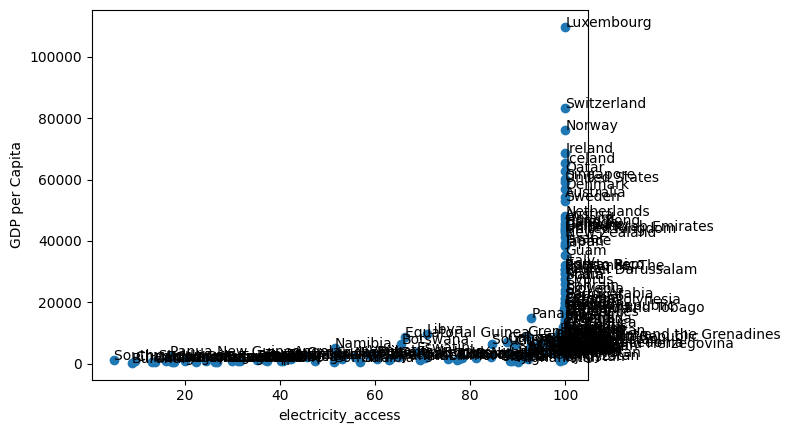

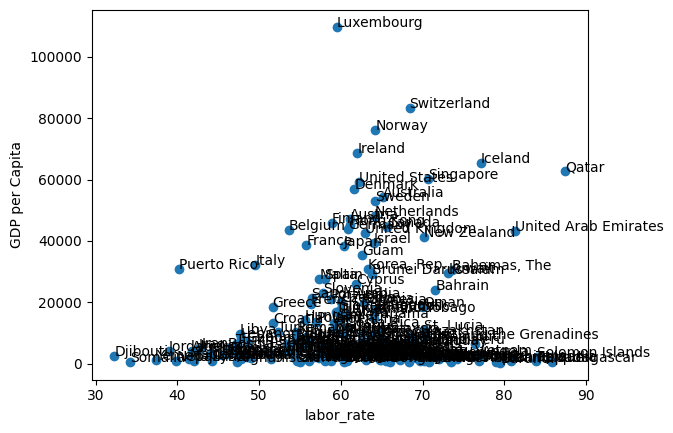

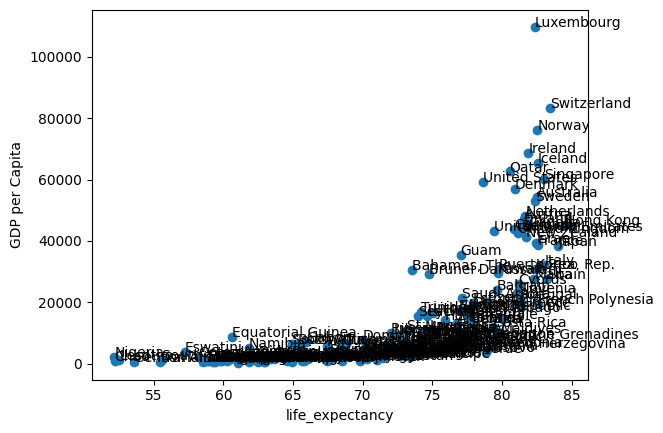

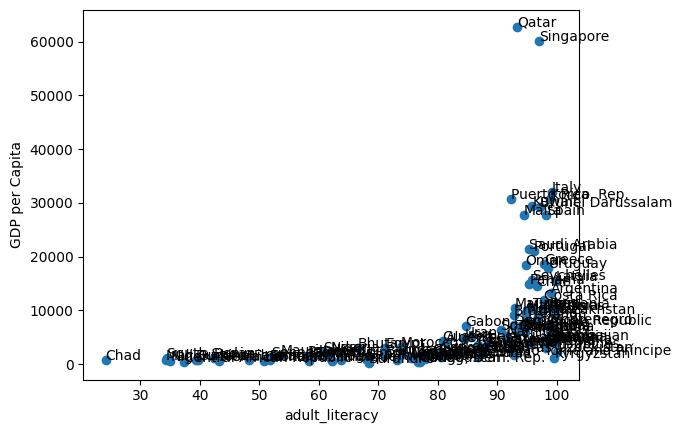

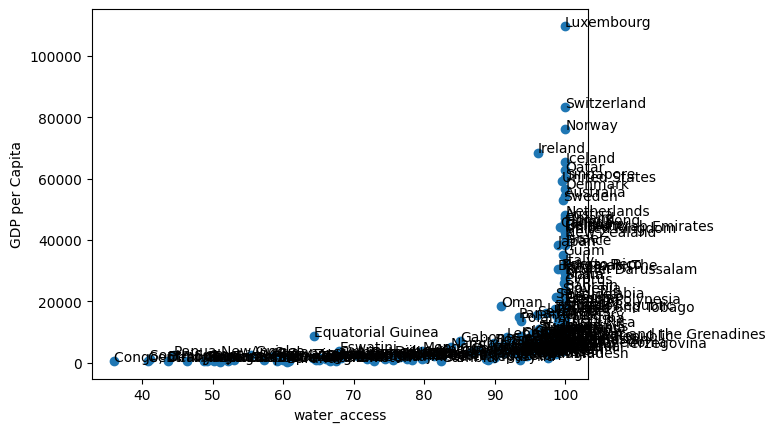

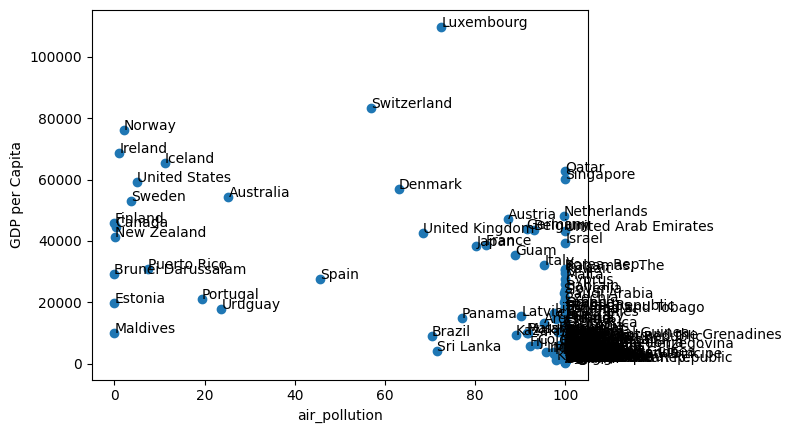

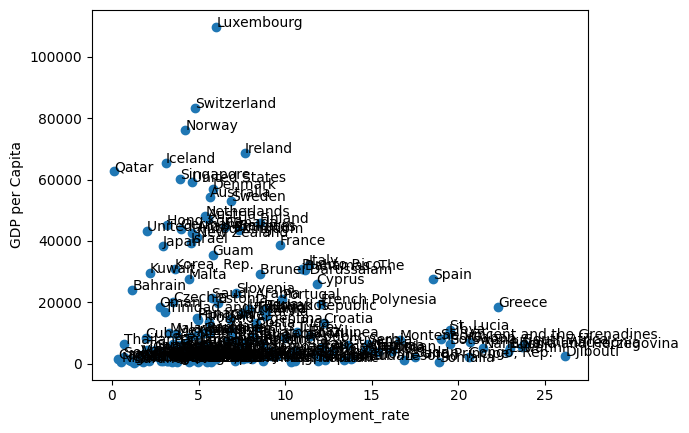

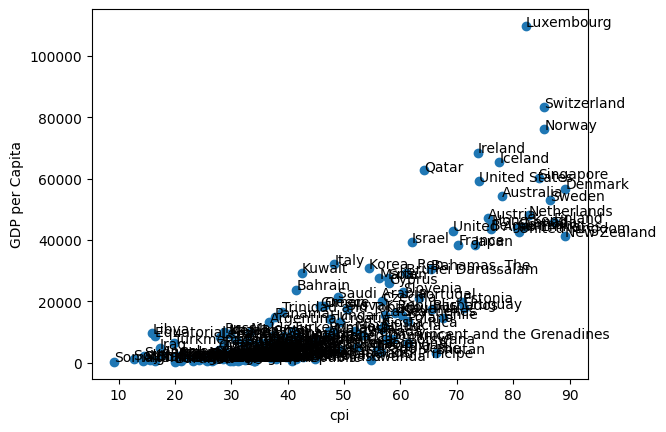

In [35]:
def scatter():
    cols = df.columns
    for i in cols:
        if i == "country": # Evitar hacer un gráfico inútil
            pass
        elif i == "gdp_capita": # Evitar hacer un gráfico inútil
            pass
        else:
            y = df["gdp_capita"]
            x = df[i]
            n = df["country"] # Para ponerle la label de cada país a los datos

            fig, ax = plt.subplots()
            ax.scatter(x, y)

            plt.ylabel("GDP per Capita")
            plt.xlabel(i)

            for i, txt in enumerate(n):
                ax.annotate(txt, (x[i], y[i]))

            plt.show()


scatter()

Se ve una clara relación lineal entre el PBI per cápita con todas las variables menos con "air_pollution", "unemployment_rate" y "labor_rate", por lo que deben ser eliminadas. Para eso vuelvo a llamar a la función previamente creada.

In [36]:
dropping_columns(FILE)

Estas son las columnas: {0: 'country', 1: 'electricity_access', 2: 'gdp_capita', 3: 'labor_rate', 4: 'life_expectancy', 5: 'adult_literacy', 6: 'water_access', 7: 'air_pollution', 8: 'unemployment_rate', 9: 'cpi'}
Ingresa las llaver numericas de a 1 para las columnas que queres eliminar: 3
Para salir escriba 'n'
Ingresa las llaver numericas de a 1 para las columnas que queres eliminar: 7
Para salir escriba 'n'
Ingresa las llaver numericas de a 1 para las columnas que queres eliminar: 8
Para salir escriba 'n'
Ingresa las llaver numericas de a 1 para las columnas que queres eliminar: n
Estas seguro que queres eliminar estas columnas: 
labor_rate
air_pollution
unemployment_rate
y/n: y


A pesar de que parece ser una variable relevante, la feature de "adult_literacy" tiene alrededor de la mitad de los datos vacíos. Son demasiados datos faltantes como para incorporarles la media, por lo que esta variable también sera eliminada.

In [38]:
dropping_columns(FILE)

Estas son las columnas: {0: 'country', 1: 'electricity_access', 2: 'gdp_capita', 3: 'life_expectancy', 4: 'adult_literacy', 5: 'water_access', 6: 'cpi'}
Ingresa las llaver numericas de a 1 para las columnas que queres eliminar: 4
Para salir escriba 'n'
Ingresa las llaver numericas de a 1 para las columnas que queres eliminar: n
Estas seguro que queres eliminar estas columnas: 
adult_literacy
y/n: y


Para visualizar mejor hice un Scatter plot con todas las features incluidas.

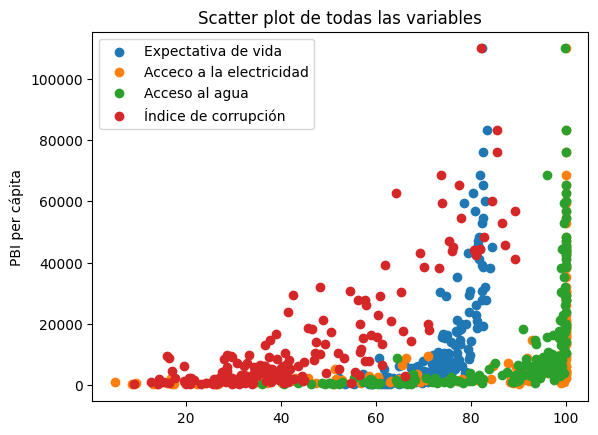

In [41]:
def scatter_all():
  # Todas las variables
  y = df["gdp_capita"]
  x_1 = df["life_expectancy"]
  x_2 = df["electricity_access"]
  x_3 = df["water_access"]
  x_4 = df["cpi"]

  plt.scatter(x_1, y, label="Expectativa de vida")
  plt.scatter(x_2, y, label="Acceco a la electricidad")
  plt.scatter(x_3, y, label="Acceso al agua")
  plt.scatter(x_4, y, label="Índice de corrupción")

  plt.ylabel("PBI per cápita")
  # Plot
  plt.title("Scatter plot de todas las variables")
  plt.legend()
  plt.show()

scatter_all()